In [17]:
import os 
print(os.listdir('../../Datasets/FlowerRecog'))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [46]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import random as rn
import tensorflow as tf 

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

# Making the functions to get the training and validation set from the Images

In [23]:
X=[]
Z=[]
IMG_SIZE= 150
FLOWER_DAISY_DIR='../../Datasets/FlowerRecog/daisy'
FLOWER_SUNFLOWER_DIR='../../Datasets/FlowerRecog/sunflower'
FLOWER_TULIP_DIR='../../Datasets/FlowerRecog/tulip'
FLOWER_DANDI_DIR='../../Datasets/FlowerRecog/dandelion'
FLOWER_ROSE_DIR='../../Datasets/FlowerRecog/rose'

In [22]:
def assign_label(img,flower_type):
    return flower_type

In [24]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))

In [25]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:01<00:00, 586.65it/s]

764


In [26]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:01<00:00, 640.54it/s]

1497


In [27]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:01<00:00, 578.06it/s]

2481


In [28]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:01<00:00, 707.15it/s]

3533


In [29]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:00<00:00, 837.18it/s]

4317


['Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',
 'Daisy',


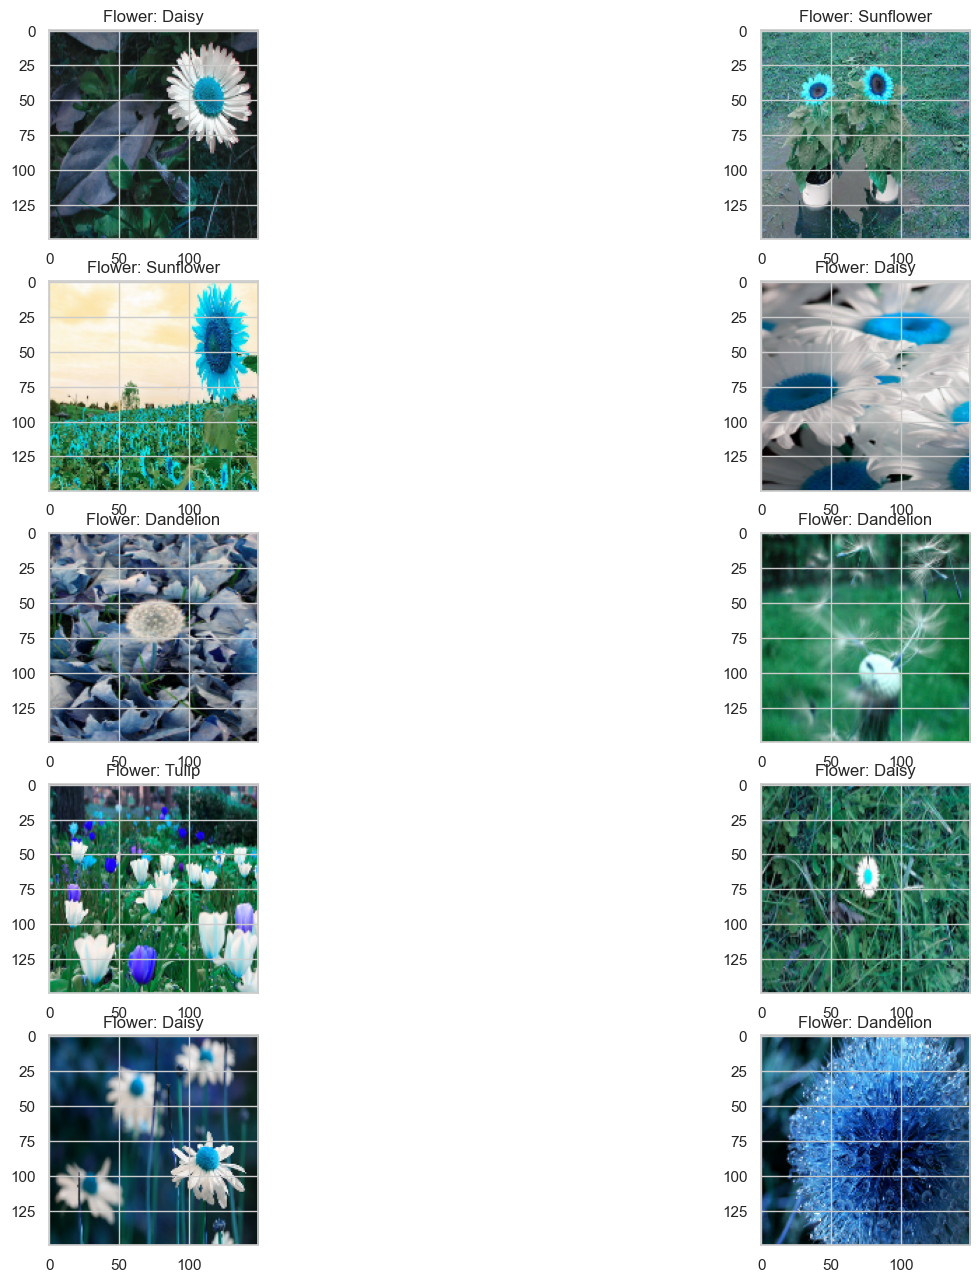

In [32]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255


4317

In [52]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


In [48]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

# Model


In [59]:


model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(150,150,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),  # Increased from 128 to 256
    Dropout(0.3),  # Slightly reduced dropout
    Dense(5, activation='softmax')
])




# Using a LR Annealer

In [50]:
batch_size=128
epochs=50
from tensorflow.keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

#Data AuG

In [53]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [60]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    10,617,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,712,517 (40.87 MB)

 Trainable params: 10,712,069 (40.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [62]:
history = model.fit(
    datagen.flow(x_train, y_train),  # Augmented training data
    validation_data=(x_test, y_test),  # Validation set
    epochs=30,
    batch_size=batch_size,
    callbacks=[red_lr]  # Adding ReduceLROnPlateau callback
)

Epoch 1/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.4524 - loss: 1.6569 - val_accuracy: 0.2306 - val_loss: 2.7233 - learning_rate: 3.0000e-04
Epoch 2/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.5207 - loss: 1.1541 - val_accuracy: 0.2306 - val_loss: 4.0053 - learning_rate: 3.0000e-04
Epoch 3/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.5473 - loss: 1.1145 - val_accuracy: 0.2306 - val_loss: 4.8453 - learning_rate: 3.0000e-04
Epoch 4/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.5762 - loss: 1.0606 - val_accuracy: 0.2306 - val_loss: 4.6219 - learning_rate: 3.0000e-04
Epoch 5/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.6070 - loss: 1.0103 - val_accuracy: 0.2111 - val_loss: 3.4559 - learning_rate: 3.0000e-04
Epoch 6/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.6459 - loss: 0.9284 - val_accuracy: 0.1907 - val_loss: 3.7680 - learning_rate: 3.0000e-04
Epoch 7/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - acc

KeyboardInterrupt: 

In [13]:
train_dir = "../../Datasets/FlowerRecog"

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # 80% train, 20% validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [15]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),  # Reduced from 512 to 128
    Dropout(0.4),  # Increased dropout
    Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,893 (18.42 MB)

 Trainable params: 4,829,445 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.3805 - loss: 1.9564 - val_accuracy: 0.2442 - val_loss: 3.1476
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.5099 - loss: 1.1873 - val_accuracy: 0.2442 - val_loss: 5.5821
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.5246 - loss: 1.1563 - val_accuracy: 0.3163 - val_loss: 2.6718
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.5831 - loss: 1.0474 - val_accuracy: 0.4395 - val_loss: 1.5666
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.5833 - loss: 1.0385 - val_accuracy: 0.6035 - val_loss: 1.1228
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6010 - loss: 1.0115 - val_accuracy: 0.6244 - val_loss: 0.9828
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.6104 - loss: 0.9776 - val_accuracy: 0.6547 - val_loss: 0.9446
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.6065 - loss: 0.9835 - val_accu